In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv('/content/blogs.csv')
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [3]:
print(df.shape)
print(df.columns)

(2000, 2)
Index(['Data', 'Labels'], dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [6]:
df.isnull().sum()

,0
Data,0
Labels,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [9]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
def clean(x):
    x=x.lower()
    x=re.sub('[\.*?/]','',x)
    x=re.sub('[%s]' %re.escape(string.punctuation),'',x)
    x=re.sub('w*\d\w*','',x)
    x=re.sub('[0-9]','',x)
    x=re.sub('[''""..,]','',x)
    return x
cleaned_data=lambda x:clean(x)

In [12]:
df['Data']=df.Data.apply(cleaned_data)

In [14]:
nltk.download('punkt_tab')
df['Data']=df['Data'].apply(word_tokenize)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Data,Labels
0,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
1,"[newsgroups, altatheism, path, cantaloupesrvcs...",alt.atheism
2,"[path, cantaloupesrvcscmuedudasnewsharvardedun...",alt.atheism
3,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
4,"[xref, cantaloupesrvcscmuedu, altatheism, talk...",alt.atheism
...,...,...
1995,"[xref, cantaloupesrvcscmuedu, talkabortion, al...",talk.religion.misc
1996,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc
1997,"[xref, cantaloupesrvcscmuedu, talkorigins, tal...",talk.religion.misc
1998,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc


In [16]:
stopword=set(stopwords.words('english'))
df['Data']=df['Data'].apply(lambda tokens:[word for word in tokens if word not in stopword])
df

,Data,Labels
0,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
1,"[newsgroups, altatheism, path, cantaloupesrvcs...",alt.atheism
2,"[path, cantaloupesrvcscmuedudasnewsharvardedun...",alt.atheism
3,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
4,"[xref, cantaloupesrvcscmuedu, altatheism, talk...",alt.atheism
...,...,...
1995,"[xref, cantaloupesrvcscmuedu, talkabortion, al...",talk.religion.misc
1996,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc
1997,"[xref, cantaloupesrvcscmuedu, talkorigins, tal...",talk.religion.misc
1998,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc


In [18]:
df['Data'] = [" ".join(doc) for doc in df['Data']]
tf = TfidfVectorizer()
tfmatrix = tf.fit_transform(df['Data'])

print('TF_TDF:','\n',tfmatrix.toarray())
print('COLUMNS NAMES','\n',tf.get_feature_names_out())

TF_TDF: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
COLUMNS NAMES 
 ['aa' 'aaa' 'aaaaarrrrgh' ... 'zyv' 'zyxel' 'zz']


In [19]:
extracted_data=pd.DataFrame(tfmatrix.toarray(),columns=tf.get_feature_names_out())
extracted_data

,aa,aaa,aaaaarrrrgh,aaboston,aafkhthmj,aalternate,aaltonen,aam,aan,aangegeven,...,zwspbh,zx,zxmkr,zy,zyda,zydacsnpsnavymil,zyehcaspianuscedu,zyv,zyxel,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Naive Bayes Model for Text Classification & Evalution**

In [22]:
features=tf.fit_transform(df['Data'])
target=df['Labels']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 41354)
(400, 41354)
(1600,)
(400,)


In [28]:
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [29]:
y_pred=model.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.8325


In [30]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.87      0.80      0.83        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.76      0.89      0.82        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.79      1.00      0.88        19
         sci.electronics       0.74      0.88      0.80        16
                 sci.med       0.88      0.88      0.88        17
         

**Sentimental Analysis**

In [31]:
#!pip install -U textblob

In [34]:
from textblob import TextBlob
def get_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity<0:
        return 'Negitive'
    else:
        return 'Neutral'

df['Sentiment']=df['Data'].apply(get_sentiment)
print(df[['Labels','Sentiment']])

                  Labels Sentiment
0            alt.atheism  Positive
1            alt.atheism  Negitive
2            alt.atheism  Positive
3            alt.atheism  Positive
4            alt.atheism  Positive
...                  ...       ...
1995  talk.religion.misc  Positive
1996  talk.religion.misc  Positive
1997  talk.religion.misc  Positive
1998  talk.religion.misc  Positive
1999  talk.religion.misc  Positive

[2000 rows x 2 columns]


In [35]:
sentiment_distribution=df.groupby('Labels')['Sentiment'].value_counts()
print(sentiment_distribution)

Labels                    Sentiment
alt.atheism               Positive     65
                          Negitive     35
comp.graphics             Positive     72
                          Negitive     28
comp.os.ms-windows.misc   Positive     77
                          Negitive     23
comp.sys.ibm.pc.hardware  Positive     81
                          Negitive     19
comp.sys.mac.hardware     Positive     74
                          Negitive     26
comp.windows.x            Positive     78
                          Negitive     20
                          Neutral       2
misc.forsale              Positive     79
                          Negitive     21
rec.autos                 Positive     77
                          Negitive     23
rec.motorcycles           Positive     72
                          Negitive     28
rec.sport.baseball        Positive     65
                          Negitive     35
rec.sport.hockey          Positive     60
                          Negitive     4

**Word Count**

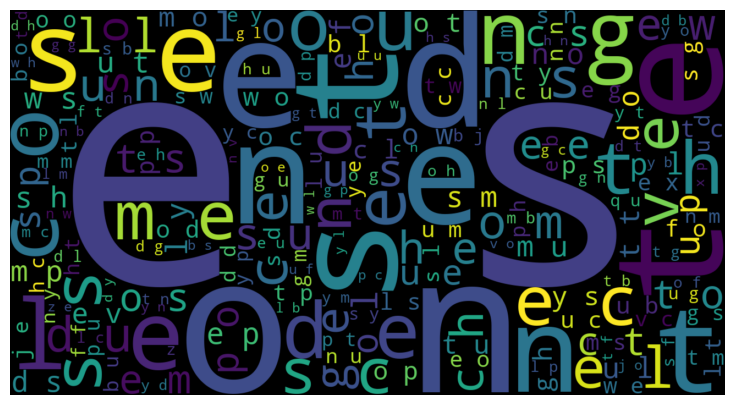

In [38]:
df['Data'] = [" ".join(doc) for doc in df['Data']]
wordcloud=WordCloud(width=1300,height=700).generate(" ".join(df['Data']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()